In [168]:
from datasets import load_dataset
ds = load_dataset('json', data_files="../../data/apps_intro_test_printllama_0.json", split='train')
ds

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 567.87it/s]
Generating train split: 67 examples [00:00, 752.53 examples/s]


Dataset({
    features: ['correct_solution_accuracy', 'difficulty', 'correct_solution', 'solutions', 'url', 'question', 'starter_code', 'problem_id', 'input_output', 'correct_solution_idx', 'formatted_solution_accuracy', 'faulty_solution_accuracy', 'repaired_solution_accuracy', 'formatted_solution_deterministic_accuracy', 'faulty_solution_deterministic_accuracy', 'repaired_solution_deterministic_accuracy', 'formatted_solutions', 'faulty_solutions', 'repaired_solutions', 'formatted_print_outputs', 'faulty_print_outputs', 'repaired_print_outputs', 'formatted_errors', 'faulty_errors', 'repaired_errors', 'codellama_prints_7b', 'codellama_responses_7b', 'print_repairs_accuracy', 'print_repairs_deterministic_accuracy', 'print_repairs_prints', 'print_repairs_errors', 'print_returns_accuracy', 'print_returns_deterministic_accuracy', 'print_returns_prints', 'print_returns_errors'],
    num_rows: 67
})

In [173]:
import numpy as np

def get_accuracies(ds):
    accuracies = {feature: [] for feature in ds.features if 'accur' in feature and 'print_returns' not in feature}
    for i in range(len(ds)):
        for feature in accuracies:
            accuracies[feature].append(np.min(ds[i][feature]) if isinstance(ds[i][feature], list) else ds[i][feature])
   
    return accuracies

accuracies = get_accuracies(ds)
# filter accuracies for formatted_solution_accuracy == 1
filtered_accuracies = {}
for feature in accuracies:
    filtered_accuracies[feature] = [accuracy for i, accuracy in enumerate(accuracies[feature]) if accuracies['formatted_solution_accuracy'][i] == 1.0]
# len(accuracies['baseline_repaired_solution_accuracy'])
# plt.hist(accuracies['baseline_repaired_solution_accuracy'])
len(filtered_accuracies['correct_solution_accuracy'])
accuracies

{'correct_solution_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'formatted_solution_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.1,
  1.0,
  1.0,
  1.0,
  1.0,
  0.2207792208,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0204081633,
  0.7142857143,
  1.0,
  0.0,
  1.0,
  0.4130434783,
  0.0,
  0.0,
  0.6222222222,
  0.6888888889,
  1.0,
  1.0,
  1.0,
  1.0,
  0.619047619,
  1.0,
  0.0,
  1.0,
  0.025,
  0.3076923077,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0

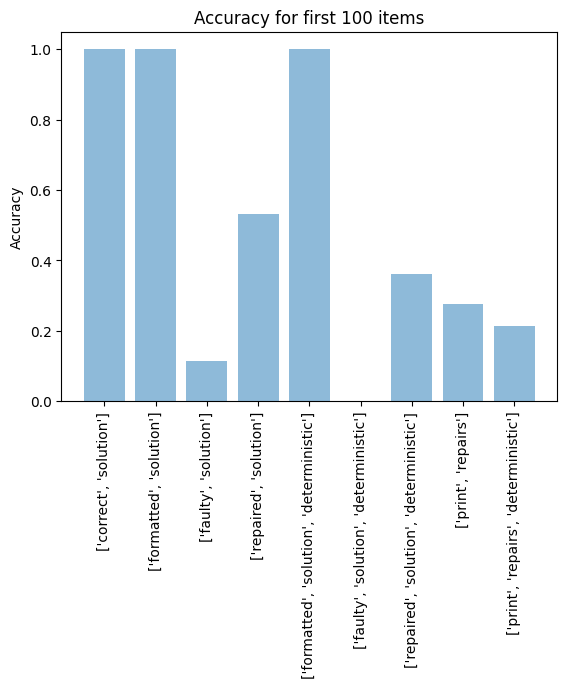

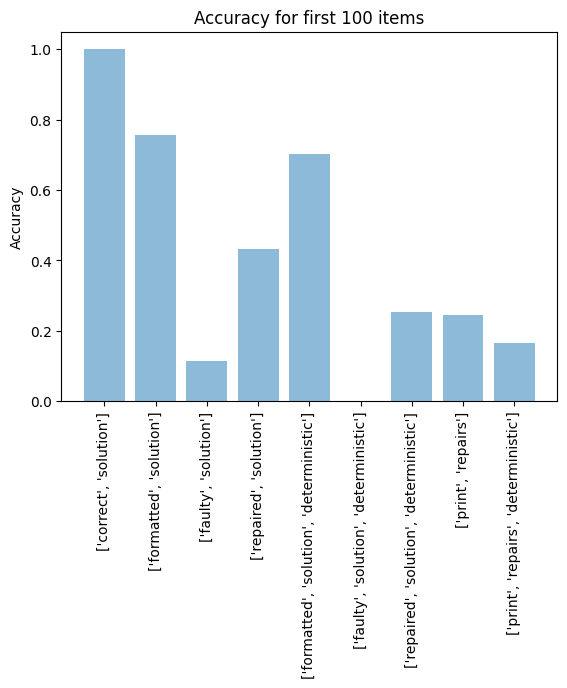

In [174]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(accuracies):
    # Ensure 'accuracies' is a dictionary with lists (or arrays) of values
    feature_names = list(accuracies.keys())
    mean_accuracies = [np.mean(accuracies[feature]) for feature in accuracies]

    plt.bar(range(len(mean_accuracies)), mean_accuracies, align='center', alpha=0.5)
    plt.xticks(range(len(feature_names)), [f.split("_")[:-1] for f in feature_names], rotation=90)
    plt.ylabel('Accuracy')
    plt.title('Accuracy for first 100 items')
    

    plt.show()

plot_accuracies(filtered_accuracies)
len(filtered_accuracies['correct_solution_accuracy'])
plot_accuracies(accuracies)

In [137]:
def get_best_prints(ds):
    best_prints = []
    for i in range(len(ds)):
        print_accuracies = ds[i]['print_repairs_accuracy']
        codellama_prints = ds[i]['codellama_prints_7b']
        best_acc_idx = np.argmax(print_accuracies)
        best_print = codellama_prints[best_acc_idx]
        best_prints.append(best_print)
    return best_prints

best_prints = get_best_prints(ds)

In [138]:
print(best_prints[0][0])

def solution_algorithm(input_values):
    input_lines = input_values.split('\n')
    n = int(input_lines[0])
    seq = sorted(list(map(int, input_lines[1].split())))[::-1]
    print(f'Original sequence: {seq}')

    a = seq[0]
    last = -1
    for i in range(len(seq)):
        if a % seq[i] != 0:
            if last != seq[i]:
                last = seq[i]
                print(f'Last divisor: {last}')
            else:
                b = seq[i]
                break
        else:
            b = seq[i]
            print(f'Found divisor: {b}')

    print(f'x: {a}, y: {b}')
    return a, b



In [139]:
from printllama.helpers import get_llama_messages, format_llama_message


system, user, assistant = get_llama_messages(ds[0]['question'], ds[0]['faulty_solutions'], best_prints[0][0])
message = format_llama_message(system, user, assistant)
print(message)

[INST] <<SYS>>
You are an expert computer science researcher and programmer, especially skilled at debugging algorithms.
<</SYS>>

I have to solve the following problem:

Recently you have received two positive integer numbers $x$ and $y$. You forgot them, but you remembered a shuffled list containing all divisors of $x$ (including $1$ and $x$) and all divisors of $y$ (including $1$ and $y$). If $d$ is a divisor of both numbers $x$ and $y$ at the same time, there are two occurrences of $d$ in the list.

For example, if $x=4$ and $y=6$ then the given list can be any permutation of the list $[1, 2, 4, 1, 2, 3, 6]$. Some of the possible lists are: $[1, 1, 2, 4, 6, 3, 2]$, $[4, 6, 1, 1, 2, 3, 2]$ or $[1, 6, 3, 2, 4, 1, 2]$.

Your problem is to restore suitable positive integer numbers $x$ and $y$ that would yield the same list of divisors (possibly in different order).

It is guaranteed that the answer exists, i.e. the given list of divisors corresponds to some positive integers $x$ and $y

In [209]:
print(a['canonical_solution'])

    for idx, elem in enumerate(numbers):
        for idx2, elem2 in enumerate(numbers):
            if idx != idx2:
                distance = abs(elem - elem2)
                if distance < threshold:
                    return True

    return False



In [210]:
print(a['test'])



METADATA = {
    'author': 'jt',
    'dataset': 'test'
}


def check(candidate):
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.95) == True
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.8) == False
    assert candidate([1.0, 2.0, 3.0, 4.0, 5.0, 2.0], 0.1) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 1.0) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 0.5) == False




In [211]:
ds.features

{'correct_solution_accuracy': Value(dtype='float64', id=None),
 'difficulty': Value(dtype='string', id=None),
 'correct_solution': Value(dtype='string', id=None),
 'solutions': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'starter_code': Value(dtype='string', id=None),
 'problem_id': Value(dtype='int64', id=None),
 'input_output': Value(dtype='string', id=None),
 'correct_solution_idx': Value(dtype='int64', id=None),
 'formatted_solution_accuracy': Value(dtype='float64', id=None),
 'faulty_solution_accuracy': Value(dtype='float64', id=None),
 'repaired_solution_accuracy': Value(dtype='float64', id=None),
 'formatted_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'faulty_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'repaired_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'formatted_solutions': Value(dtype='string', id=None),
 'faulty_solutions': Value(dtype

In [7]:
sol = "def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a, b\n"
try:
    exec(sol, globals())
except Exception as e:
    print(e)

In [2]:
input_output_pairs = {'inputs': ['10\n10 2 8 1 2 4 1 20 4 5\n', '4\n9973 9973 1 1\n', '66\n35 90 36 7560 189 14 360 180 168 12 1 252 21 8 630 15 40 1512 18 9973 108 7 540 3 210 270 2520 504 1890 6 378 70 1080 30 20 84 1260 420 105 9 135 28 60 72 315 24 63 126 27 280 45 5 120 1 42 945 216 4 756 140 840 56 10 2 54 3780\n', '128\n540 90 378 3780 270 35 180 15 6 14 20 3780 2520 140 1080 54 540 120 1890 15 420 840 20 756 10 126 42 54 36 14 216 8 168 210 60 7 63 2 216 21 30 189 28 135 2 630 21 30 60 1512 7560 70 5 12 40 7560 252 378 3 108 5 72 10 3 28 24 1 27 9 45 180 56 1260 945 1080 420 168 2520 18 70 1 27 9 7 315 4 84 40 504 360 252 6 8 360 315 140 45 210 84 56 945 135 1260 280 756 90 108 630 36 42 72 504 1512 189 120 105 105 280 24 270 63 18 840 1890 126 35 12 4\n', '23\n16 128 256 27 32 243 1 512 64 8192 2 1024 81 8 1 4 729 4096 3 2187 6561 9 2048\n', '65\n108 90 27 72 2520 30 3780 35 20 21 315 42 63 120 1 945 135 1512 28 40 210 756 9 24 180 1890 1 2 189 378 5 1080 280 168 126 840 45 7 6 216 630 4 7560 18 8 56 140 504 60 105 54 252 3 360 1260 15 420 12 14 36 270 70 10 540 84\n', '28\n8192 4 128 1024 8 4 2048 8 16 64 2 512 1 2048 32 256 8192 4096 64 4096 256 16 1024 512 128 2 32 1\n', '2\n1 1\n', '50\n1250 5000 250 1000 500 10 40 250 80 16 10000 125 200 50 80 1 4 20 1 10000 2500 100 4 20 625 10 2 200 8 1000 16 2000 400 5 5 2500 8 400 5000 2 625 125 50 25 2000 1250 100 40 500 25\n', '89\n1080 126 315 18 3780 84 180 2520 12 756 70 504 15 9 36 630 20 2 2500 360 200 1000 100 108 5000 5 14 1890 10 90 105 7560 2 80 16 28 35 840 1 189 125 6 4 1512 945 40 10 210 8 25 280 8 20 270 27 1260 72 420 120 168 30 625 500 540 140 42 252 1 54 50 56 40 21 7 1250 63 216 250 4 10000 5 400 3 60 45 24 135 2000 378\n', '8\n1234 4321 29 1 2 1 149 617\n', '64\n945 130 78 135 91 630 14 2730 27 1 35 2 5 210 9 65 195 1365 7 3 390 70 455 10 15 378 3 315 39 105 273 10 21 2 45 15 546 35 42 90 18 182 26 910 63 189 30 210 6 70 105 30 54 270 1890 6 13 5 21 7 1 42 14 126\n', '20\n1 243 1 6561 128 81 4 8 32 16 3 2187 64 512 9 27 256 1024 2 729\n', '12\n66 6 3 33 22 3 1 1 2 11 11 33\n', '6\n6 1 1 2 3 3\n', '14\n14 28 2 2 56 1 14 28 4 7 1 7 8 4\n', '69\n1 7560 2 3780 3 2520 4 1890 5 1512 6 1260 7 1080 8 945 9 840 10 756 12 630 14 540 15 504 18 420 20 378 21 360 24 315 27 280 28 270 30 252 35 216 36 210 40 189 42 180 45 168 54 140 56 135 60 126 63 120 70 108 72 105 84 90 1 2 4 8 16\n', '14\n2 1 3 1 16 2 12 8 24 6 3 6 48 4\n', '10\n2 1 5 6 15 2 30 10 3 1\n', '18\n1 2 4 5 10 20 1 2 4 5 10 20 30 60 15 3 6 12\n', '5\n1 3 9 3 1\n', '7\n1 1 2 2 4 4 8\n', '6\n1 7 1 14 7 2\n', '7\n1 2 4 1 2 4 8\n', '8\n1 2 4 1 2 4 8 16\n', '12\n5 2 10 8 20 4 2 4 1 40 1 8\n', '6\n29 29 1 1 58 2\n', '10\n1 2 4 5 10 20 1 2 5 10\n', '8\n16 8 4 2 1 4 2 1\n', '10\n1 2 5 10 1 2 4 5 10 20\n', '5\n1 2 4 1 2\n', '12\n3 15 1 10 2 15 1 3 30 5 5 6\n', '10\n1 2 1 2 4 5 5 10 10 20\n', '5\n1 7 49 1 7\n', '5\n1 1 2 2 4\n', '6\n29 58 2 29 1 1\n', '10\n7 14 5 35 70 1 7 2 10 1\n', '5\n1 2 1 2 4\n', '15\n12 36 8 4 6 9 72 2 4 2 1 18 24 3 1\n', '12\n1 2 8 4 3 24 4 6 1 2 8 12\n', '12\n2 32 64 4 16 16 8 8 2 1 1 4\n', '5\n31 1 1 7 49\n', '12\n2 3 13 3 39 13 1 6 39 26 78 1\n', '9\n7 49 1 1 98 14 49 7 2\n', '6\n13 5 1 1 13 65\n', '4\n1 61 31 1\n', '5\n1 5 5 25 1\n', '5\n25 5 1 5 1\n', '10\n1 1 2 2 3 3 4 6 6 12\n', '5\n25 5 5 1 1\n', '6\n23 1 2 46 23 1\n', '18\n10 1 4 5 20 10 40 16 20 8 2 5 8 40 2 80 1 4\n', '6\n1 1 2 2 5 10\n', '10\n6 10 1 3 15 5 2 61 30 1\n', '6\n1 6 3 2 3 1\n', '16\n30 1 3 90 9 27 3 9 45 10 6 18 1 15 2 5\n', '11\n54 18 1 3 27 9 6 1 9 3 2\n', '7\n1 2 4 8 16 1 2\n', '7\n1 16 1 4 2 2 8\n', '6\n1 1 2 5 5 10\n', '9\n9 2 6 3 18 1 1 3 9\n', '13\n1 2 3 4 6 9 12 18 36 1 2 3 6\n', '6\n1 1 2 3 3 6\n', '8\n2 2 1 5 50 25 10 1\n', '4\n67 1 13 1\n', '18\n75 3 9 8 18 2 12 36 25 3 15 72 24 4 6 1 5 1\n', '12\n2 1 3 12 4 8 24 4 1 8 6 2\n', '9\n20 10 5 4 2 1 4 2 1\n', '18\n8 8 3 16 4 2 20 2 5 4 24 6 40 1 1 10 80 12\n', '13\n100 50 25 20 10 5 4 2 1 10 5 2 1\n', '6\n94 2 47 1 1 3\n', '6\n58 2 2 1 29 1\n', '20\n1 18 10 9 2 15 5 45 3 10 1 30 15 6 5 2 30 3 6 90\n', '13\n2 1 8 10 2 4 16 5 40 1 4 20 80\n', '6\n6 3 1 3 2 1\n', '10\n1 3 5 15 1 3 5 9 15 45\n', '6\n47 47 2 94 1 1\n', '14\n4 56 14 4 2 7 28 8 14 7 1 1 2 28\n', '6\n1 1 2 2 4 8\n', '6\n55 5 11 1 1 5\n', '11\n36 2 3 1 18 6 2 4 1 9 12\n', '6\n1 2 31 31 1 62\n', '10\n1 7 11 77 121 847 1 7 11 77\n', '4\n1 1 2 7\n', '18\n90 18 2 9 5 6 18 1 6 3 1 3 10 45 9 15 2 30\n', '6\n1 2 1 2 4 8\n', '20\n24 16 32 2 3 96 1 2 12 48 4 6 8 12 6 8 24 3 4 1\n', '10\n1 2 3 6 1 2 3 4 6 12\n', '10\n11 11 1 44 2 22 4 22 1 2\n', '10\n3 1 15 2 30 10 1 5 23 6\n', '8\n1 3 9 27 81 1 3 9\n', '6\n6 1 3 3 2 1\n', '10\n76 38 1 2 1 4 5 3 15 19\n', '6\n1 2 3 6 1 3\n', '6\n23 23 2 1 1 46\n', '3\n1 3 1\n', '12\n4 1 1 12 6 21 63 2 9 3 7 3\n', '6\n11 1 2 22 2 1\n', '10\n21 3 63 9 5 1 15 7 1 3\n', '10\n3 11 1 11 1 33 33 3 9 99\n', '10\n22 1 33 11 3 6 66 11 1 2\n', '18\n4 2 30 5 3 1 12 6 4 60 12 15 1 3 6 10 2 20\n', '16\n2 7 84 14 6 1 7 1 3 21 12 42 28 2 4 14\n', '6\n1 2 5 10 1 5\n', '3\n1 1 2\n', '12\n3 1 2 6 5 1 10 2 10 5 30 15\n', '10\n3 1 5 30 10 2 15 6 3 1\n', '21\n72 9 3 6 3 1 18 36 2 24 36 2 12 4 9 12 8 18 6 4 1\n', '11\n2 6 12 4 18 3 1 3 36 1 9\n', '18\n1 4 12 6 72 8 3 36 1 18 9 18 24 2 3 2 9 6\n', '11\n36 3 1 1 4 9 12 2 3 18 6\n', '6\n65 1 5 5 1 13\n', '8\n1 2 17 17 34 68 1 4\n', '5\n1 1 3 3 9\n', '10\n39 26 6 1 1 2 13 78 3 13\n', '12\n2 5 50 25 25 5 10 20 100 1 4 1\n', '14\n1 6 9 90 10 5 5 2 30 1 18 15 3 45\n', '10\n17 17 1 34 4 68 2 2 34 1\n', '16\n4 36 3 4 2 1 72 9 8 2 6 8 12 24 18 1\n', '11\n1 9 54 27 6 3 2 1 9 3 18\n', '5\n1 3 3 9 1\n', '8\n1 65 29 58 5 2 1 13\n', '3\n1 2 1\n', '14\n2 2 3 7 1 42 14 28 84 4 21 6 12 1\n', '8\n7 14 7 1 2 4 1 28\n', '6\n1 2 1 2 3 6\n', '12\n25 20 2 5 1 1 4 10 50 100 5 25\n', '10\n1 8 3 9 4 2 33 11 99 1\n', '6\n1 11 1 11 5 55\n', '10\n32 1 1 2 2 8 4 4 8 16\n', '8\n9 9 1 81 3 27 1 3\n', '6\n7 1 11 7 77 1\n', '20\n12 21 7 21 2 1 6 42 3 42 3 7 4 84 14 14 2 6 28 1\n', '4\n1 2 53 1\n', '14\n1 2 4 5 8 10 20 40 1 2 4 5 10 20\n', '18\n1 4 16 3 12 12 3 24 1 4 6 48 8 6 2 24 2 8\n', '4\n5 1 1 61\n', '15\n24 8 4 3 2 6 1 2 32 1 48 12 96 4 16\n', '6\n62 1 31 31 2 1\n', '11\n2 18 4 27 54 3 2 1 6 1 9\n', '18\n6 1 36 3 1 9 9 72 4 18 12 6 2 3 18 8 2 24\n', '6\n1 3 2 1 39 13\n', '6\n87 29 29 3 1 1\n', '12\n4 8 7 14 14 2 2 7 28 56 1 1\n', '6\n2 1 43 86 1 2\n', '12\n21 2 33 6 66 7 3 3 1 1 11 22\n', '5\n1 7 1 49 7\n', '12\n2 1 16 4 6 3 8 1 48 24 2 12\n', '4\n1 43 1 13\n', '11\n5 2 25 100 20 50 10 1 5 1 4\n', '9\n27 6 81 3 3 1 1 2 9\n', '6\n1 1 29 3 87 29\n', '8\n15 5 3 75 1 5 1 25\n', '10\n4 32 16 4 1 2 8 64 2 1\n', '8\n3 12 6 4 3 1 1 2\n', '6\n47 1 1 94 7 2\n', '12\n3 7 1 1 21 14 21 6 3 42 2 7\n', '8\n1 5 1 2 4 5 10 20\n', '16\n2 1 5 30 1 6 12 2 4 10 60 20 10 5 15 3\n', '20\n9 12 2 24 36 24 1 3 18 6 8 72 12 4 1 2 8 3 6 4\n', '14\n24 9 18 8 6 12 72 1 3 4 1 5 2 36\n', '6\n1 7 1 7 5 35\n', '16\n6 4 1 1 6 2 2 36 8 3 12 9 3 18 24 72\n', '3\n67 1 1\n', '6\n1 58 29 1 2 2\n', '20\n12 8 6 96 4 3 16 8 32 12 6 4 48 1 24 3 24 1 2 2\n', '4\n5 25 1 1\n', '8\n5 33 9 99 3 11 1 1\n', '6\n1 1 17 51 3 3\n', '8\n87 7 14 1 2 29 1 3\n', '6\n23 23 2 46 1 1\n', '10\n1 1 2 2 4 5 5 10 10 20\n', '9\n81 2 1 9 27 3 6 3 1\n', '14\n48 16 4 6 1 8 3 4 12 1 2 2 8 24\n', '6\n1 2 2 14 1 7\n', '14\n12 18 4 2 2 72 6 36 24 8 3 1 9 1\n', '12\n15 5 10 1 1 5 6 30 3 2 3 15\n', '6\n1 2 5 95 1 19\n', '10\n1 7 42 7 1 2 21 3 14 6\n', '9\n1 18 2 6 9 1 3 3 9\n', '12\n8 6 1 3 1 4 12 24 2 16 48 3\n', '5\n1 25 1 5 5\n', '7\n3 27 1 81 3 1 9\n', '11\n6 24 8 1 2 4 1 12 3 4 2\n', '11\n4 10 5 20 25 2 50 1 2 100 1\n', '8\n23 46 2 4 1 1 23 92\n', '6\n85 17 5 17 1 1\n', '9\n4 4 11 44 2 22 2 1 1\n', '11\n2 4 1 4 16 32 16 8 8 1 2\n', '14\n8 2 16 5 2 1 10 1 4 80 20 10 5 40\n', '11\n18 2 1 3 12 6 1 4 2 36 9\n', '6\n1 2 4 8 1 16\n', '8\n10 4 20 2 1 1 5 2\n', '5\n1 1 3 9 3\n', '18\n10 20 4 12 30 6 5 5 3 4 10 1 20 1 15 2 2 60\n', '13\n4 16 8 4 2 1 8 64 1 2 32 16 32\n', '10\n27 54 18 1 2 1 9 3 6 3\n', '8\n7 6 1 1 5 3 2 35\n', '16\n28 2 14 4 3 12 84 6 7 21 1 2 3 42 6 1\n', '10\n9 1 11 33 1 11 99 3 33 3\n', '11\n2 1 6 12 8 2 24 3 4 1 4\n', '18\n2 6 8 6 2 4 1 3 1 36 72 3 12 24 12 4 18 9\n', '15\n96 48 16 4 2 24 12 6 1 8 2 1 4 32 3\n', '18\n12 28 3 3 14 6 4 7 2 42 12 21 6 1 2 1 84 4\n', '15\n5 3 3 6 15 18 45 9 9 10 1 90 2 1 30\n', '12\n10 1 5 100 25 20 4 2 50 1 5 25\n', '6\n3 1 3 1 6 2\n', '10\n95 1 19 6 18 1 9 5 3 2\n', '18\n72 24 2 3 6 8 3 6 18 9 9 36 1 2 1 12 18 4\n', '6\n71 47 2 1 94 1\n', '20\n8 96 5 2 6 12 10 1 4 6 3 48 3 32 30 15 2 16 1 24\n', '7\n9 3 1 31 93 3 1\n', '10\n1 1 2 2 4 4 5 8 10 20\n', '12\n7 5 14 2 1 14 70 35 2 1 7 10\n', '4\n1 1 29 19\n', '14\n4 12 1 1 2 6 30 10 5 20 3 60 15 5\n', '11\n3 36 12 3 9 18 6 4 2 1 1\n', '12\n1 24 2 16 48 3 4 8 3 1 6 12\n', '10\n4 3 6 2 12 1 24 3 8 1\n', '6\n1 16 4 1 8 2\n', '5\n7 49 2 1 1\n', '7\n1 27 81 1 9 3 7\n', '4\n4 1 2 1\n', '13\n50 25 5 100 1 4 10 1 2 20 2 4 8\n', '9\n8 5 16 1 32 1 4 2 64\n', '8\n32 64 1 4 16 8 1 2\n', '12\n3 4 1 12 48 16 1 24 2 6 8 3\n', '4\n1 3 9 1\n', '6\n5 1 5 19 1 95\n', '9\n64 32 16 1 2 1 8 3 4\n', '5\n1 1 67 2 4\n', '5\n1 3 1 3 9\n', '9\n9 27 81 3 27 1 9 3 1\n', '8\n10 1 1 20 2 5 5 4\n', '5\n5 3 1 25 1\n', '6\n2 5 3 15 1 1\n', '10\n4 1 1 6 3 24 8 3 2 12\n', '3\n5 1 1\n', '4\n1 1 5 25\n', '12\n5 70 5 1 35 2 1 2 7 14 10 10\n', '4\n9 1 1 3\n', '9\n81 4 1 9 3 1 27 8 2\n', '6\n1 2 4 1 5 25\n', '9\n1 2 4 1 2 4 5 10 20\n'], 'outputs': ['20 8\n', '9973 9973\n', '9973 7560\n', '7560 7560\n', '8192 6561\n', '7560 1\n', '8192 8192\n', '1 1\n', '10000 10000\n', '10000 7560\n', '4321 1234\n', '2730 1890\n', '6561 1024\n', '66 33\n', '6 3\n', '56 28\n', '7560 16\n', '48 6\n', '30 2\n', '60 20\n', '9 3\n', '8 4\n', '14 7\n', '8 4\n', '16 4\n', '40 8\n', '58 29\n', '20 10\n', '16 4\n', '20 10\n', '4 2\n', '30 15\n', '20 10\n', '49 7\n', '4 2\n', '58 29\n', '70 7\n', '4 2\n', '72 4\n', '24 8\n', '64 16\n', '49 31\n', '78 39\n', '98 49\n', '65 13\n', '61 31\n', '25 5\n', '25 5\n', '12 6\n', '25 5\n', '46 23\n', '80 40\n', '10 2\n', '61 30\n', '6 3\n', '90 27\n', '54 9\n', '16 2\n', '16 2\n', '10 5\n', '18 9\n', '36 6\n', '6 3\n', '50 2\n', '67 13\n', '75 72\n', '24 8\n', '20 4\n', '80 24\n', '100 10\n', '94 3\n', '58 2\n', '90 30\n', '80 4\n', '6 3\n', '45 15\n', '94 47\n', '56 28\n', '8 2\n', '55 5\n', '36 2\n', '62 31\n', '847 77\n', '7 2\n', '90 18\n', '8 2\n', '96 24\n', '12 6\n', '44 22\n', '30 23\n', '81 9\n', '6 3\n', '76 15\n', '6 3\n', '46 23\n', '3 1\n', '63 12\n', '22 2\n', '63 15\n', '99 33\n', '66 11\n', '60 12\n', '84 14\n', '10 5\n', '2 1\n', '30 10\n', '30 3\n', '72 36\n', '36 3\n', '72 18\n', '36 3\n', '65 5\n', '68 17\n', '9 3\n', '78 13\n', '100 25\n', '90 5\n', '68 34\n', '72 8\n', '54 9\n', '9 3\n', '65 58\n', '2 1\n', '84 2\n', '28 7\n', '6 2\n', '100 25\n', '99 8\n', '55 11\n', '32 8\n', '81 9\n', '77 7\n', '84 42\n', '53 2\n', '40 20\n', '48 24\n', '61 5\n', '96 4\n', '62 31\n', '54 4\n', '72 18\n', '39 2\n', '87 29\n', '56 14\n', '86 2\n', '66 21\n', '49 7\n', '48 2\n', '43 13\n', '100 5\n', '81 6\n', '87 29\n', '75 5\n', '64 4\n', '12 3\n', '94 7\n', '42 21\n', '20 5\n', '60 10\n', '72 24\n', '72 5\n', '35 7\n', '72 6\n', '67 1\n', '58 2\n', '96 24\n', '25 1\n', '99 5\n', '51 3\n', '87 14\n', '46 23\n', '20 10\n', '81 6\n', '48 8\n', '14 2\n', '72 2\n', '30 15\n', '95 2\n', '42 7\n', '18 9\n', '48 3\n', '25 5\n', '81 3\n', '24 4\n', '100 2\n', '92 23\n', '85 17\n', '44 4\n', '32 16\n', '80 10\n', '36 2\n', '16 1\n', '20 2\n', '9 3\n', '60 20\n', '64 32\n', '54 3\n', '35 6\n', '84 6\n', '99 33\n', '24 4\n', '72 12\n', '96 4\n', '84 12\n', '90 9\n', '100 25\n', '6 3\n', '95 18\n', '72 18\n', '94 71\n', '96 30\n', '93 9\n', '20 8\n', '70 14\n', '29 19\n', '60 5\n', '36 3\n', '48 3\n', '24 3\n', '16 1\n', '49 2\n', '81 7\n', '4 1\n', '100 8\n', '64 5\n', '64 1\n', '48 3\n', '9 1\n', '95 5\n', '64 3\n', '67 4\n', '9 3\n', '81 27\n', '20 5\n', '25 3\n', '15 2\n', '24 3\n', '5 1\n', '25 1\n', '70 10\n', '9 1\n', '81 8\n', '25 4\n', '20 4\n']}

In [21]:
from printllama.helpers import evaluate_solutions

In [3]:
# evaluate_solutions(solution, input_output_pairs)


def compare_outputs(
    actual: str,
    expected: str,
) -> bool:
    """Compare outputs."""
    expected_normalized = expected.strip().split()
    if isinstance(actual, (tuple, list)):
        actual_normalized = [str(item) for item in actual]
    else:
        actual_normalized = [str(actual)]

    return actual_normalized == expected_normalized

In [4]:
results, print_outputs, error_messages = [], [], []   

import contextlib
import io

for input, output in zip(input_output_pairs['inputs'], input_output_pairs['outputs']):
    with io.StringIO() as buf, contextlib.redirect_stdout(buf):
        try:
            result = solution_algorithm(input)
            results.append(compare_outputs(result, output))
        except Exception as e:
            results.append(False)
            error_messages.append(str(e))
        print_outputs.append(buf.getvalue())


accuracy = sum(1 for r in results if r == True) / len(results) if results else 0.0

In [5]:
print_outputs[0]

'Original sequence: [20, 10, 8, 5, 4, 4, 2, 2, 1, 1]\nFound divisor: 20\nFound divisor: 10\nLast divisor: 8\nFound divisor: 5\nFound divisor: 4\nFound divisor: 4\nFound divisor: 2\nFound divisor: 2\nFound divisor: 1\nFound divisor: 1\nx: 20, y: 1\n'

In [9]:
sol = """def solution_algorithm(input_values):
    input_lines = input_values.split('\\n')
    n = int(input_lines[0])
    divisors = list(map(int, input_lines[1].split()))
    divisors.sort(reverse=True)
    x = divisors[0]
    divisors = [d for d in divisors if x % d != 0 or divisors.count(d) > 1]
    y = divisors[0] if divisors else x
    return x, y"""
exec(sol, globals())

In [11]:
"def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a, b\n"

(20, 8)

In [13]:
a = """def solution_algorithm(input_values):\n    input_lines = input_values.split('\\n')\n    n = int(input_lines[0])\n    seq = sorted(list(map(int, input_lines[1].split())))[::-1]\n    print(f'Original sequence: {seq}')\n\n    a = seq[0]\n    last = -1\n    for i in range(len(seq)):\n        if a % seq[i] != 0:\n            if last != seq[i]:\n                last = seq[i]\n                print(f'Last divisor: {last}')\n            else:\n                b = seq[i]\n                break\n        else:\n            b = seq[i]\n            print(f'Found divisor: {b}')\n\n    print(f'x: {a}, y: {b}')\n    return a"""

In [15]:
exec(a)